In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("us_state_totals_2017.csv", thousands=",")
data.drop(columns = ["FIPS CODE", "Employment Noise Flag", "Annual Payroll Noise Flag"], inplace = True)

data["Employment"] == data["Employment"].astype('float32')
data["Annual Payroll"] == data["Annual Payroll"].astype('float32')

payroll = 30000000
estabilishments = 800000
esta = data[(data["Annual Payroll"] > payroll) & (data["Estabilishments"] > estabilishments) & (data["State"] != "United States")]
print("These are the only places with a annual payroll higher than " + str(payroll) + " and the number of estabilishments higher than " + str(estabilishments))
print(esta)
if len(esta) == 1: 
        print("Looks like there is only state with a annual payroll higher than " + str(payroll) + " and the number of estabilishments higher than " + str(estabilishments))
else: print("Both areas are in California, meaning that California has the highest combined payoll and number of estabilishments")
state = "California"

data.sort_values("Annual Payroll", axis = 0, ascending = False, inplace = True, kind = 'heapsort', na_position = 'last')
data2 = data[data["State"] != "United States"]
print()
print("A certain area in these states have the highest annual payroll, in descending order")
print()
print(data2.head(10))
data3 = data2.head(10)
number_1 = data2.loc[0]
number_1_row = 1


print()
print(data2.head(1))
number_1_val = data2.iat[0, 4]
number_1_state = str(data2.iat[0, 0])
print()
print("As you can see #1 with the highest payroll is: " + number_1_state)

if state==number_1_state:
    print(state + " has the highest payroll and estabilishments combined, but it also has the highest the highest employment rate.")
print("The number of people employed in " + number_1_state + " is " + str(int(number_1_val)))

#finding the ranking of the top 10 in terns of Employment
data3.sort_values("Employment", axis = 0, inplace = True, kind = 'quicksort', na_position = 'last')
print()
print("The order changes however, when these top 10 are ranked in descending order in terms of Employment. ")
print(data3.head(10))
col = data3.head(10)
row = 1

#finding the row the topper is now in
print()
for i in col["Employment"]:
   
    if i == float(number_1_val):
        if row == number_1_row:
            print("looks like the topper is still the same though")
        elif row == len(col):
            print("Interesting, the topper for highest payroll is now last in the top 10.")
            print("See? " + number_1_state + " with an Employment of " + str(number_1_val) + " is now at the bottom")
        else:
            difference = row - number_1_row
            print("Wow, the topper for highest payroll has moved back " + str(difference) + " rows.")
            print("See? " + number_1_state + " with an Employment of " + str(number_1_val) + " is now at row #" + str(difference))
        
    row += 1
   



         


These are the only places with a annual payroll higher than 30000000 and the number of estabilishments higher than 800000
         State Enterprises     Firms  Estabilishments  Employment  \
53  California  01:  Total  763803.0         941377.0  14896625.0   
60  California   08:  <500  757458.0         808213.0   7224945.0   

    Annual Payroll  
53     955043843.0  
60     375608143.0  
Both areas are in California, meaning that California has the highest combined payoll and number of estabilishments

A certain area in these states have the highest annual payroll, in descending order

            State Enterprises     Firms  Estabilishments  Employment  \
53     California  01:  Total  763803.0         941377.0  14896625.0   
61     California   09:  500+    6345.0         133164.0   7671680.0   
305      New York  01:  Total  465566.0         547034.0   8261269.0   
404         Texas  01:  Total  442641.0         592677.0  10580160.0   
98        Florida  01:  Total  453218.0      

<ipython-input-242-f5b6504a4140>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.sort_values("Employment", axis = 0, inplace = True, kind = 'quicksort', na_position = 'last')



As you can see, there is a strong correlation between the number of estabilishments and the number of businesses in a certain area.


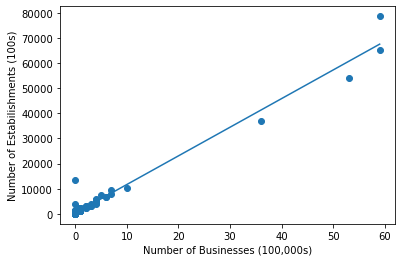

In [243]:
business = []
estabilishments = []
payroll = []
for i in range(0, len(data)): 
    firm = data["Firms"][i]
    estabilish = data["Estabilishments"][i]
    pay = data["Annual Payroll"][i] 
    if pd.notna(firm):
        firm /= 10**5
        firm = int(firm)
        business.append(firm)
    if pd.notna(estabilish):
        estabilish /= 10**2
        estabilish = int(estabilish)
        estabilishments.append(estabilish)
    
    if pd.notna(pay) and data["State"][i] != "United States":
            pay /= 10**5
            pay = int(pay)
            payroll.append(pay)


scatter_plot = plt.scatter(business, estabilishments)
plt.xlabel("Number of Businesses (100,000s)")
plt.ylabel("Number of Estabilishments (100s)") 
plt.plot(np.unique(business), np.poly1d(np.polyfit(business, estabilishments, 1))(np.unique(business)))

print()
print("As you can see, there is a strong correlation between the number of estabilishments and the number of businesses in a certain area.")



The most frequent annual payroll in a certain area of a state is between 0 and 7000000


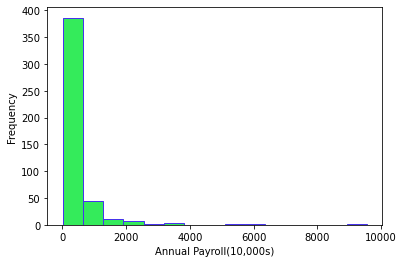

In [238]:

plt.hist(payroll, bins = 15, color= '#34eb5b', edgecolor = '#4634eb')
plt.xlabel("Annual Payroll(10,000s)")
plt.ylabel("Frequency")
print("The most frequent annual payroll in a certain area of a state is between 0 and 7000000.")